In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# create df
df = pd.read_csv('hr_employee_churn_data.csv')

In [3]:
df.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [4]:
df.shape

(14999, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14997 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


# Feature Engineering

In [6]:
df2 = df.copy()

In [7]:
df2.drop(['empid'], axis=1, inplace=True)

In [8]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,low,1
1,0.80,0.86,5,262,6,0,0,medium,1
2,0.11,0.88,7,272,4,0,0,medium,1
3,0.72,0.87,5,223,5,0,0,low,1
4,0.37,0.52,2,159,3,0,0,low,1


In [9]:
df2.isnull().sum()

satisfaction_level       2
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [10]:
df2.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14997.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612863,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,0.248634,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [11]:
df2['satisfaction_level'].unique()

array([0.38, 0.8 , 0.11, 0.72, 0.37,  nan, 0.1 , 0.92, 0.89, 0.42, 0.45,
       0.84, 0.41, 0.36, 0.78, 0.76, 0.09, 0.46, 0.4 , 0.82, 0.87, 0.57,
       0.43, 0.13, 0.44, 0.39, 0.85, 0.81, 0.9 , 0.74, 0.79, 0.17, 0.24,
       0.91, 0.71, 0.86, 0.14, 0.75, 0.7 , 0.31, 0.73, 0.83, 0.32, 0.54,
       0.27, 0.77, 0.88, 0.48, 0.19, 0.6 , 0.12, 0.61, 0.33, 0.56, 0.47,
       0.28, 0.55, 0.53, 0.59, 0.66, 0.25, 0.34, 0.58, 0.51, 0.35, 0.64,
       0.5 , 0.23, 0.15, 0.49, 0.3 , 0.63, 0.21, 0.62, 0.29, 0.2 , 0.16,
       0.65, 0.68, 0.67, 0.22, 0.26, 0.99, 0.98, 1.  , 0.52, 0.93, 0.97,
       0.69, 0.94, 0.96, 0.18, 0.95])

In [12]:
df2 = df2.dropna()

In [13]:
df2.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [14]:
df2.shape

(14997, 9)

In [15]:
df2['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [16]:
salary_dummies = pd.get_dummies(df2['salary'], drop_first=True, dtype=int)
# drop first is used to avoid the dummy variable drop and to decrease our feature count
# this just means taht if both `low` and 'medium' values are 0/False, it denotes 'high' is True indirectly
salary_dummies

,low,medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
14994,1,0
14995,1,0
14996,1,0
14997,1,0


In [17]:
df2 = pd.concat([df2, salary_dummies], axis=1)
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,low,medium
0,0.38,0.53,2,157,3,0,0,low,1,1,0
1,0.80,0.86,5,262,6,0,0,medium,1,0,1
2,0.11,0.88,7,272,4,0,0,medium,1,0,1
3,0.72,0.87,5,223,5,0,0,low,1,1,0
4,0.37,0.52,2,159,3,0,0,low,1,1,0


In [18]:
df2.drop(['salary'], inplace=True, axis=1)
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,low,medium
0,0.38,0.53,2,157,3,0,0,1,1,0
1,0.80,0.86,5,262,6,0,0,1,0,1
2,0.11,0.88,7,272,4,0,0,1,0,1
3,0.72,0.87,5,223,5,0,0,1,1,0
4,0.37,0.52,2,159,3,0,0,1,1,0


# Split into Train and Test Set

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# separate dataset into features and label
X = df2.drop(['left'], axis=1)
y = df2['left']

In [21]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,low,medium
0,0.38,0.53,2,157,3,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,1
3,0.72,0.87,5,223,5,0,0,1,0
4,0.37,0.52,2,159,3,0,0,1,0


In [22]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
len(X_train)

11997

In [25]:
len(X_test)

3000

# Model Selection

In [26]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [28]:
# create model parameters

model_param = {
    'RandomForestClassifier':{
        'model': RandomForestClassifier(),
        'param': {
            'n_estimators': [10, 50, 100, 130],
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2,4,1),
            'max_features': ['sqrt', 'log2']
        },
    },
    'XGBClassifier': {
        'model': XGBClassifier(objective='binary:logistic'),
        'param': {
            'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}

In [29]:
scores = []
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'], param_grid=mp['param'], cv=5)
    model_selection.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

In [30]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.9216517728131599,
  'best_params': {'criterion': 'gini',
   'max_depth': 3,
   'max_features': 'sqrt',
   'n_estimators': 10}},
 {'model': 'XGBClassifier',
  'best_score': 0.9910650883627877,
  'best_params': {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 200}}]

# Model Building

In [35]:
# we choose xgboost based on the model comparison
model_xgb = XGBClassifier(objective='binary:logistic',
                          learning_rate=0.1,
                          max_depth=20,
                          n_estimators=200
)

In [36]:
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [37]:
model_xgb.score(X_test, y_test)

0.9923333333333333

In [40]:
X_test[:1]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,low,medium
1672,0.84,0.83,4,239,5,0,0,1,0


In [41]:
y_test[:1]

1672    1
Name: left, dtype: int64

In [42]:
model_xgb.predict(X_test[:1])

array([1])

# Model Performance Metrics

In [43]:
# confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_xgb.predict(X_test))
cm

array([[2267,    6],
       [  17,  710]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual')

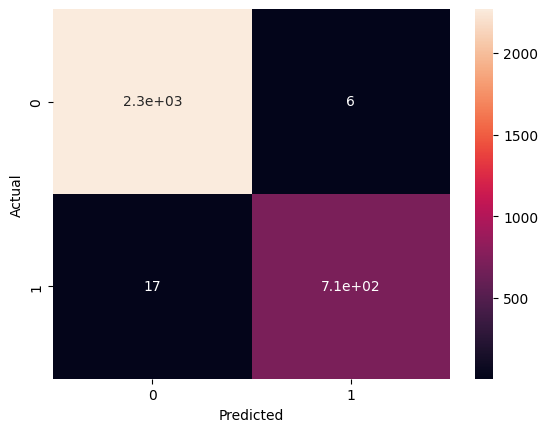

In [45]:
# plot the confusion matrix

sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')